# Exploratory Data Analysis & Intro

## Goal
1. Understand the structure of the data
2. Identify key features and variables
3. Visualize the data to gain insights
4. Identify outliers and remove them from the dataset
5. Identify potential relationships and patterns between the variables

## Final Deliverables:
- A clear and concise report summarizing the key findings and insights from the data analysis
- A set of visualizations that effectively communicate the insights and patterns in the data
- Create a summary page (via [README.md](README.md)) that outlines the key findings and insights from the data analysis




## Questions to Answer
1. What kinds of pollutants affect Air Quality Index the most?
2. What are the common patterns or trends in the Air Quality Index over time?
3. Is there a relationship between changes in the air quality index and air concentrations of at least one or more pollutants over time?
4. What are the differences in air quality and pollutant concentration between the 7 major cities selected?

================================================================================
## Exploratory Data Analysis for the Air Quality Dataset - Part 1
### Data Cleaning & Introduction to the Dataset Variables 
- What is the basic layout of the data set variables used in this analysis?

================================================================================

### Importing Libraries and Downloading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import calendar
import kagglehub

# Download latest version of datasets
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")
#Selecting the chosen datasets for this Project
df_station_hour = pd.read_csv(r'C:\Users\Lenovo\.cache\kagglehub\datasets\rohanrao\air-quality-data-in-india\versions\12\station_hour.csv')
df_stations = pd.read_csv(r'C:\Users\Lenovo\.cache\kagglehub\datasets\rohanrao\air-quality-data-in-india\versions\12\stations.csv')
# Creating the df_cities dataset, that selects stations accordingly to the cities they are settled in based on their Station Id
df_station_hour = df_station_hour[df_station_hour['Datetime'].isna() == False]
df_cities = pd.merge(df_station_hour, df_stations, how = 'left', on = 'StationId')

# Removing the Inactive stations from the df_cities dataset
df_cities = df_cities[df_cities['Status'] == 'Active']

#Transforming Datetime Column from Object to Datetime
df_cities['Datetime'] = pd.to_datetime(df_cities['Datetime'])

### Create a Box Plot Visualization to View the Range and View the Outliers of Selected Numeric Variables

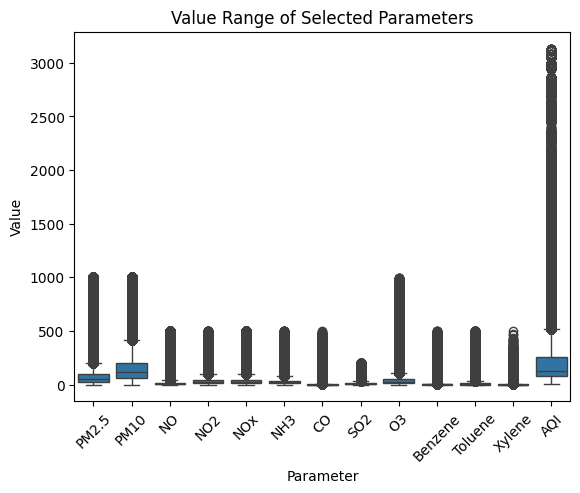

In [18]:
#Boxplot value range of Selected Air Pollution Indicators
data = df_cities.loc[:, 'PM2.5':'AQI']
data_melted = data.melt(var_name='Parameter', value_name='Value')
sns.boxplot(data=data_melted, x='Parameter', y = 'Value')
plt.title('Value Range of Selected Parameters')
plt.xticks(rotation=45)
plt.show()

### Create a Function To Remove Unnecessary Outliers from the Dataset

In [12]:
#creating the function to remove outliers from the dataset
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

### Box Plot Visualization of the Cleaned Version of the Dataset

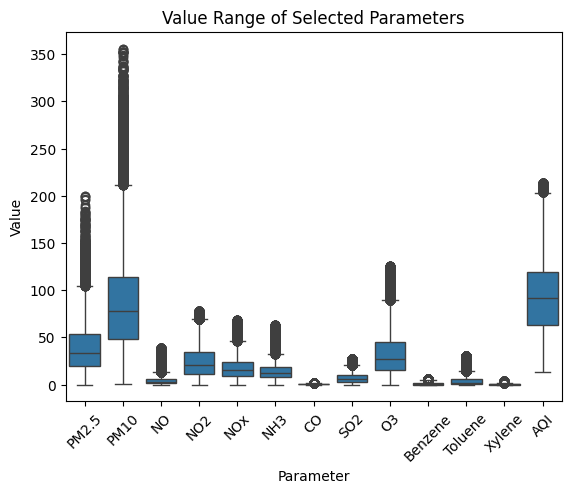

In [17]:
#Removed outliers: Box Plot value range of Selected Air Pollution Indicators
data = df_cities.loc[:, 'PM2.5':'AQI']
filtered_data = remove_outliers(data)
data_box = filtered_data
data_melted = data_box.melt(var_name='Parameter', value_name='Value')
sns.boxplot(data=data_melted, x='Parameter', y = 'Value')
plt.title('Value Range of Selected Parameters')
plt.xticks(rotation=45)
plt.show()

### Adding Extra Column Of Months in the Dataset

In [14]:
# Creating df_city dataset for the purpose of yearly analysis of each pollutant measures
df_city = df_cities.copy()
df_city.loc[:, 'PM2.5' : 'AQI'] = remove_outliers(df_city.loc[:, 'PM2.5' : 'AQI'])

# Adding the Month column to the dataset
df_city['Month'] = df_city['Datetime'].dt.month
datetime_index = df_city.columns.get_loc('Datetime')
df_city.insert(datetime_index + 1, 'Month', df_city.pop('Month'))

## Replacing integer values of Month column with corresponding month names
df_city['Month'] = df_city['Month'].apply(lambda x: calendar.month_name[x])
df_city['Month'] = pd.Categorical(df_city['Month'], 
                                   categories=list(calendar.month_name[1:]),  # Get month names from January to December
                                   ordered=True)

### Generating a Box Plot of the Distribution of Pollutant Concentrations over the Average Yearly Span

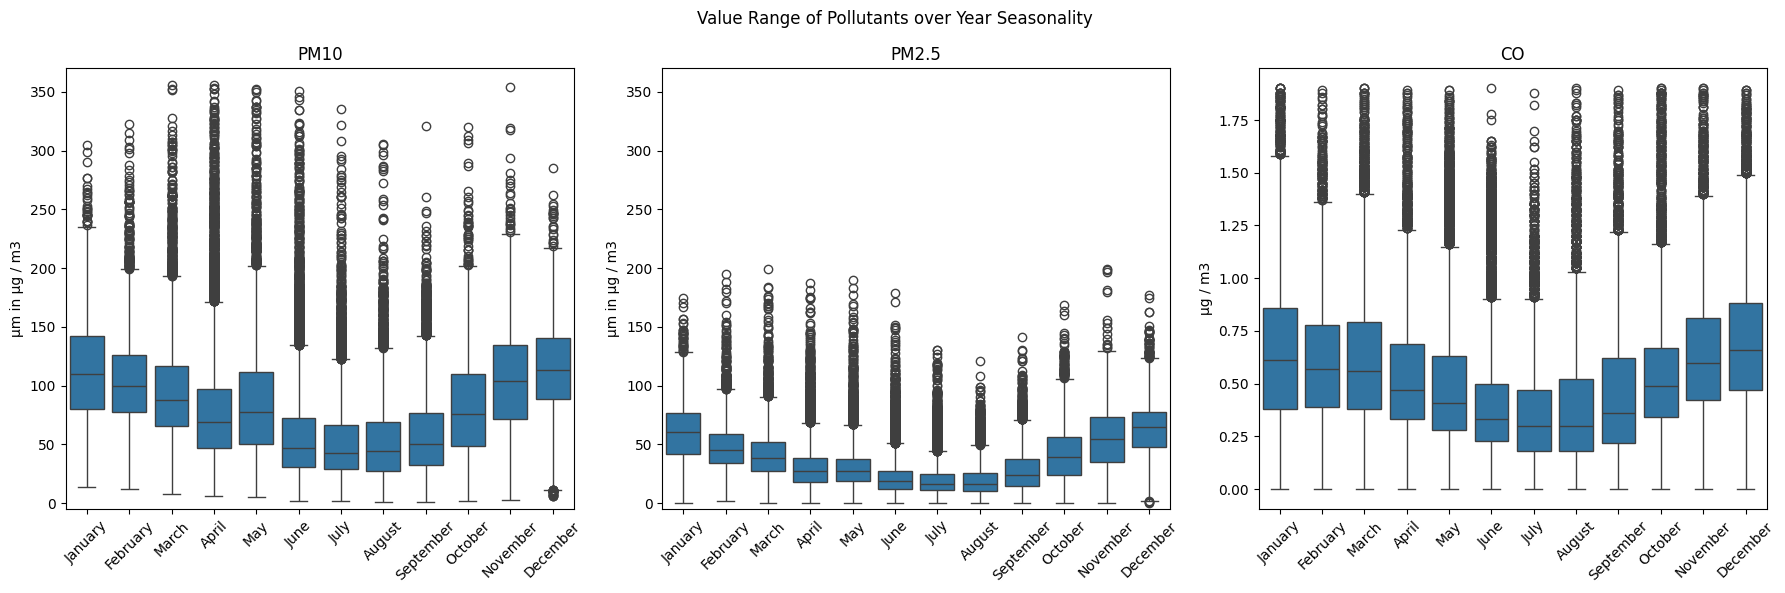

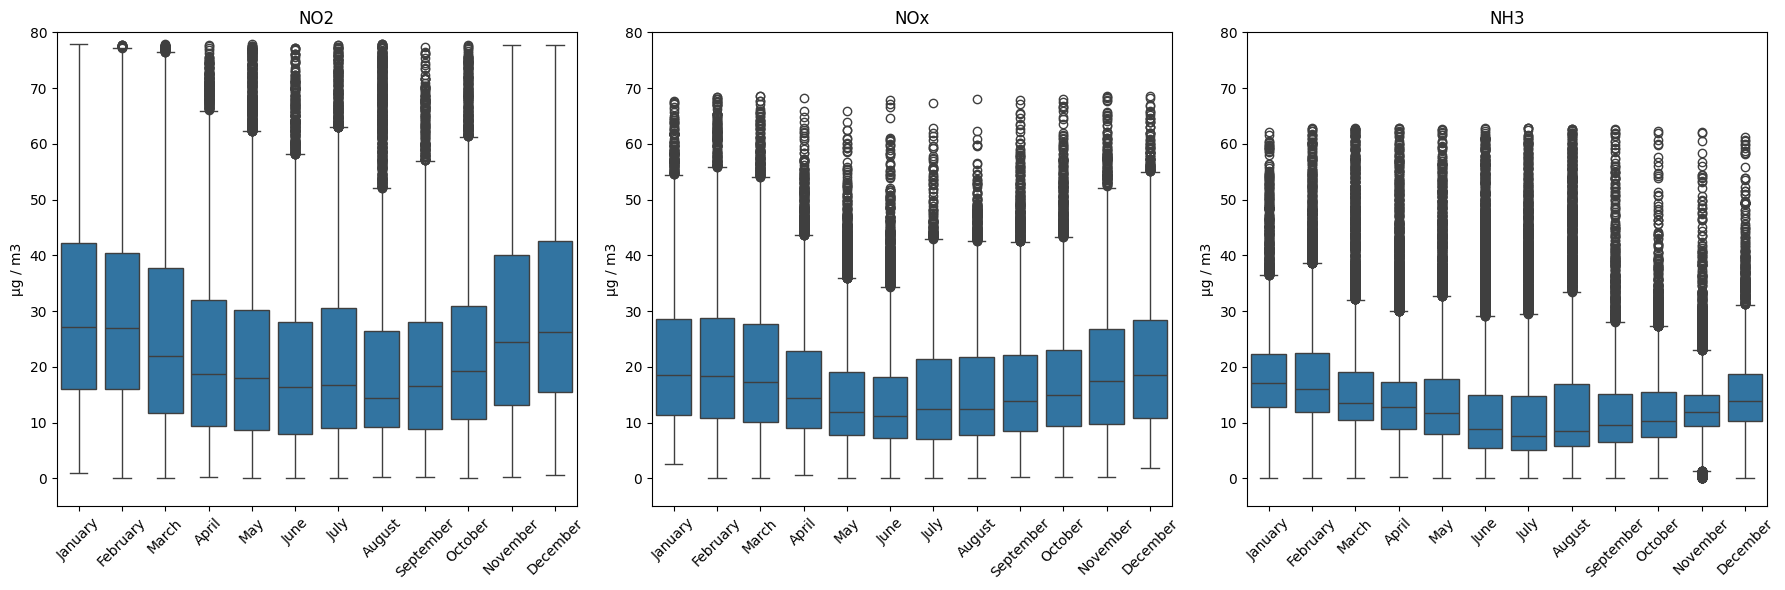

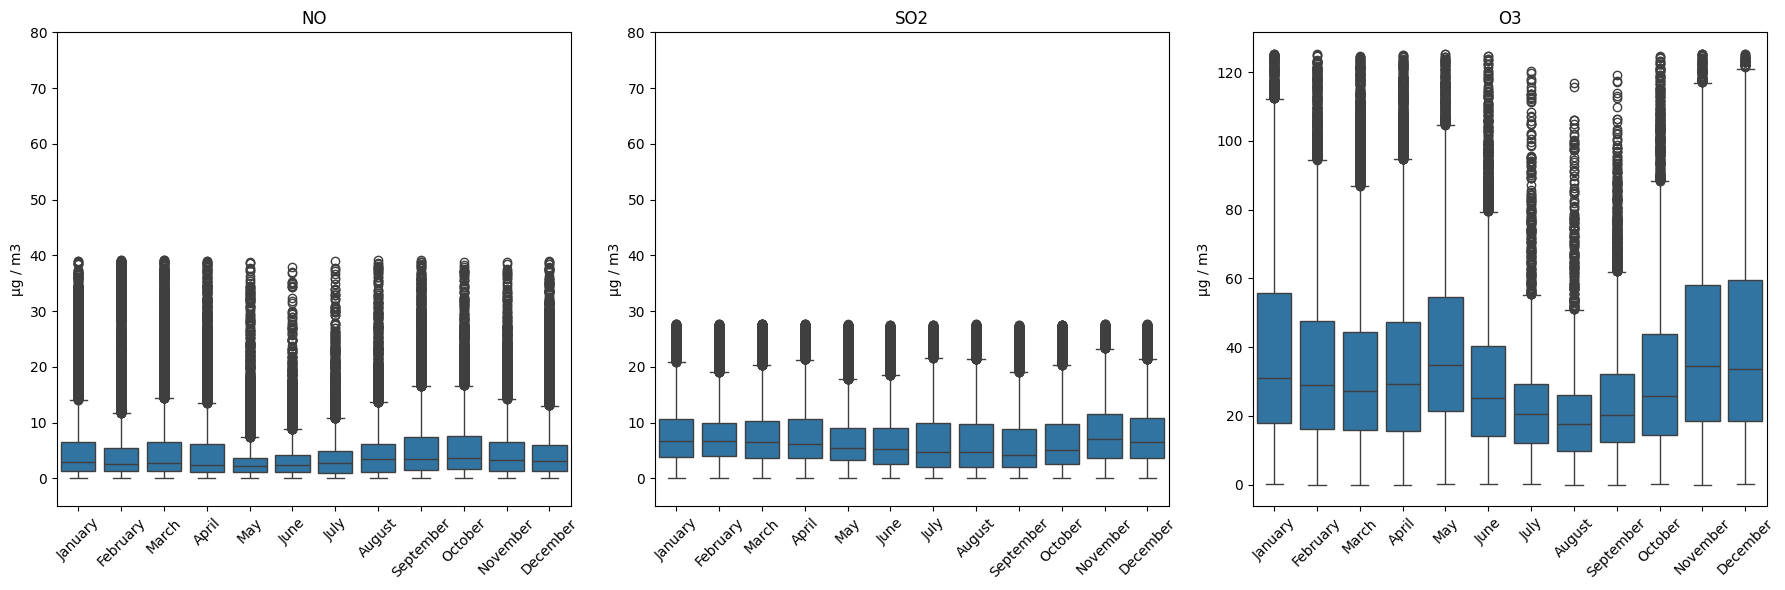

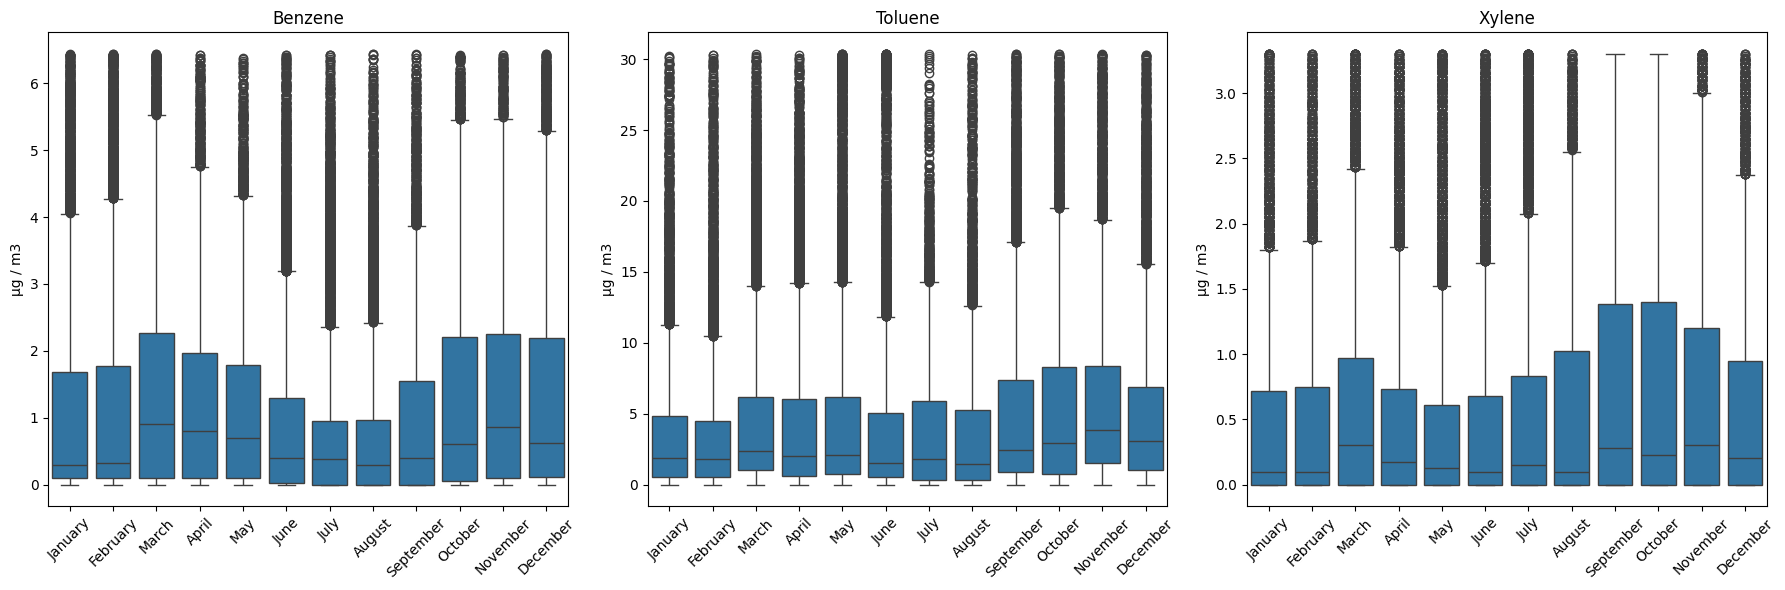

In [15]:
# Creating Box Plots Summarizing the Yearly Distribution of Pollutant Concentration

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Value Range of Pollutants over Year Seasonality')
sns.boxplot(data=df_city, x='Month', y = 'PM10', ax = ax1)
ax1.set_title('PM10')
ax1.set_ylabel('µm in µg / m3')
ax1.set_xlabel('')
ax1.set_ylim(-5, 370)
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'PM2.5', ax = ax2)
ax2.set_title('PM2.5')
ax2.set_ylabel('µm in µg / m3')
ax2.set_xlabel('')
ax2.set_ylim(-5, 370)
ax2.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'CO', ax = ax3)
ax3.set_title('CO')
ax3.set_ylabel('µg / m3')
ax3.set_xlabel('')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()                    
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
sns.boxplot(data=df_city, x='Month', y = 'NO2', ax= ax1)
ax1.set_title('NO2')
ax1.set_ylabel('µg / m3')
ax1.set_xlabel('')
ax1.set_ylim(-5, 80)
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'NOx', ax= ax2)
ax2.set_title('NOx')
ax2.set_ylabel('µg / m3')
ax2.set_xlabel('')
ax2.set_ylim(-5, 80)
ax2.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'NH3', ax = ax3)
ax3.set_title('NH3')
ax3.set_ylabel('µg / m3')
ax3.set_xlabel('')
ax3.set_ylim(-5, 80)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()                    
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
sns.boxplot(data=df_city, x='Month', y = 'NO', ax= ax1)
ax1.set_title('NO')
ax1.set_ylabel('µg / m3')
ax1.set_xlabel('')
ax1.set_ylim(-5, 80)
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'SO2', ax= ax2)
ax2.set_title('SO2')
ax2.set_ylabel('µg / m3')
ax2.set_xlabel('')
ax2.set_ylim(-5, 80)
ax2.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'O3', ax = ax3)
ax3.set_title('O3')
ax3.set_ylabel('µg / m3')
ax3.set_xlabel('')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()                    
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
sns.boxplot(data=df_city, x='Month', y = 'Benzene', ax= ax1)
ax1.set_title('Benzene')
ax1.set_ylabel('µg / m3')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'Toluene', ax= ax2)
ax2.set_title('Toluene')
ax2.set_ylabel('µg / m3')
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)

sns.boxplot(data=df_city, x='Month', y = 'Xylene', ax = ax3)
ax3.set_title('Xylene')
ax3.set_ylabel('µg / m3')
ax3.set_xlabel('')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()                    
plt.show()

### Generate a For loop to iterate over Selected Variables to Generate Identical Box Plot Distributions.

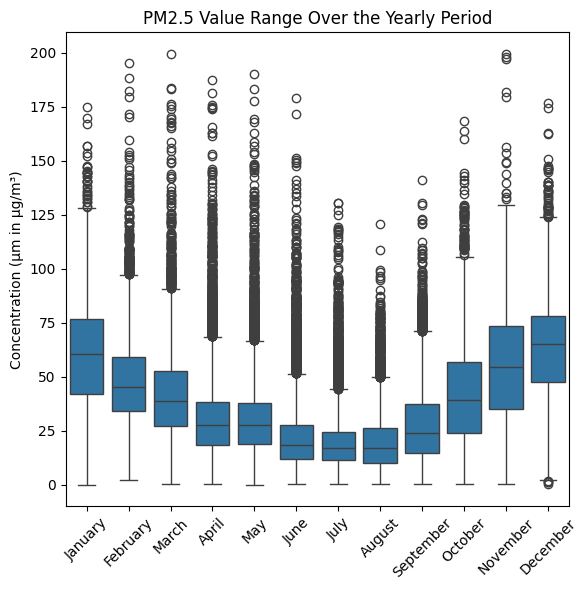

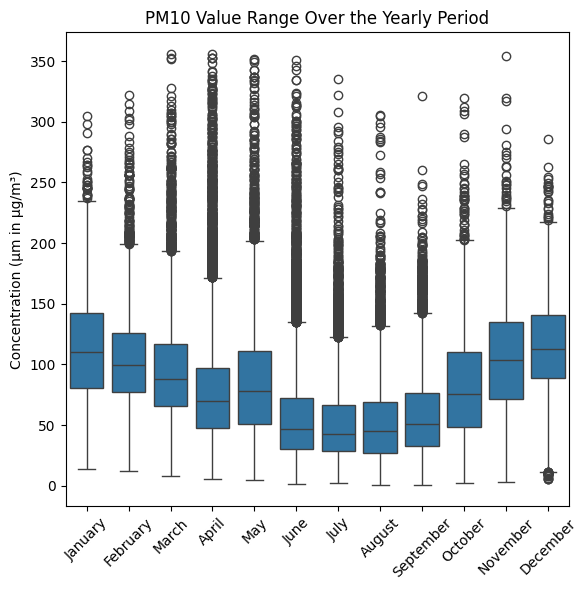

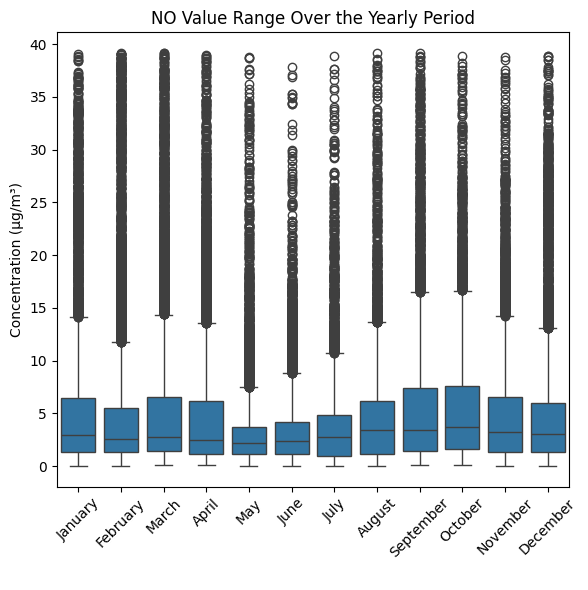

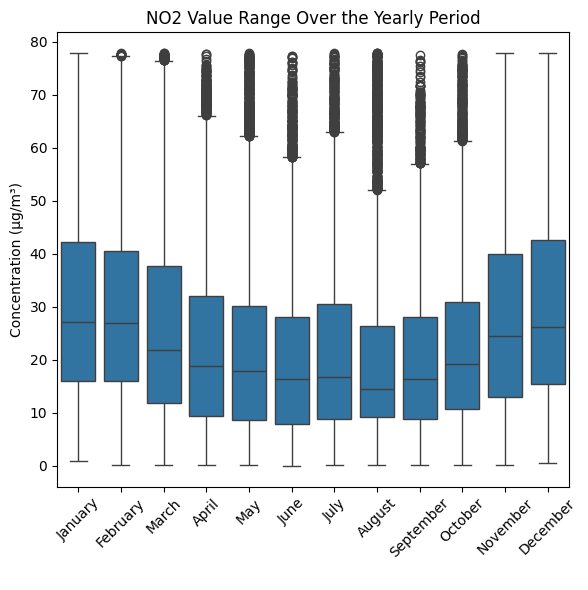

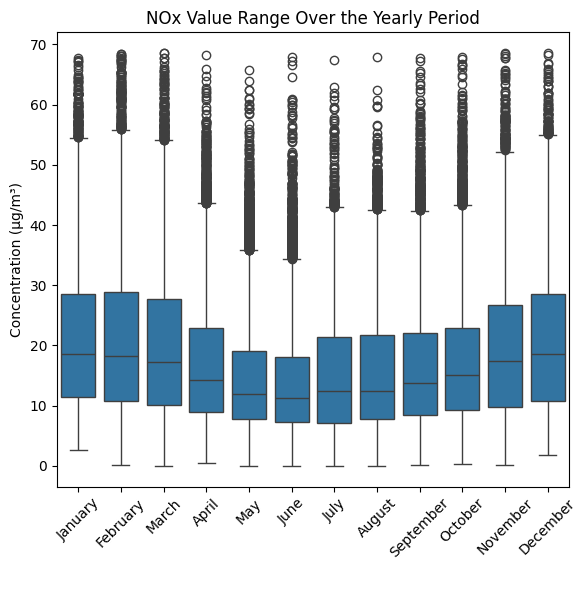

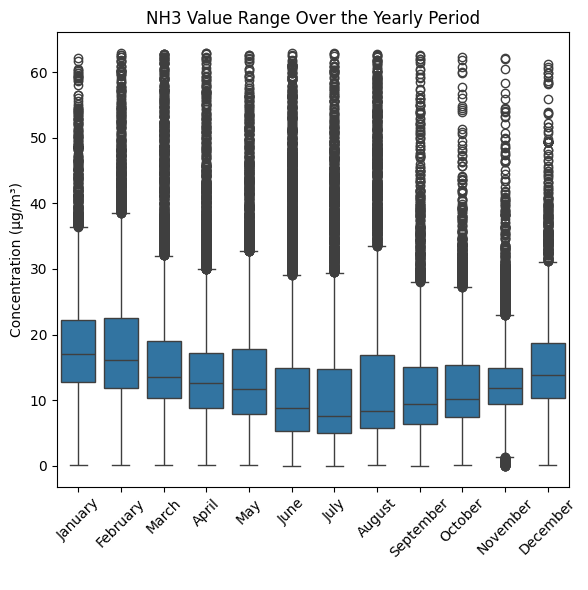

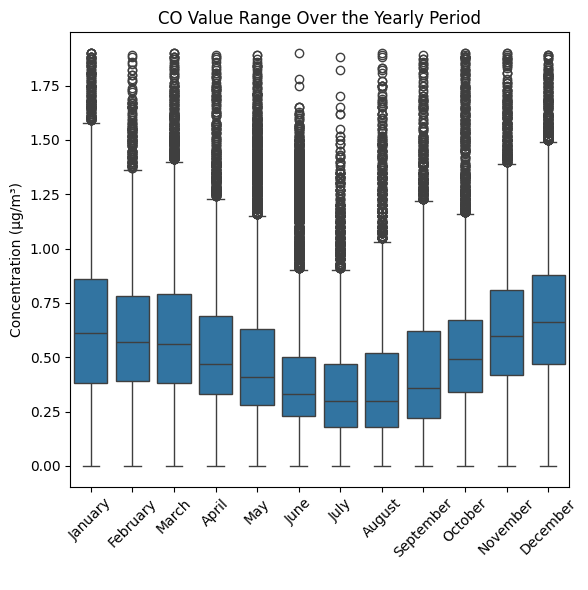

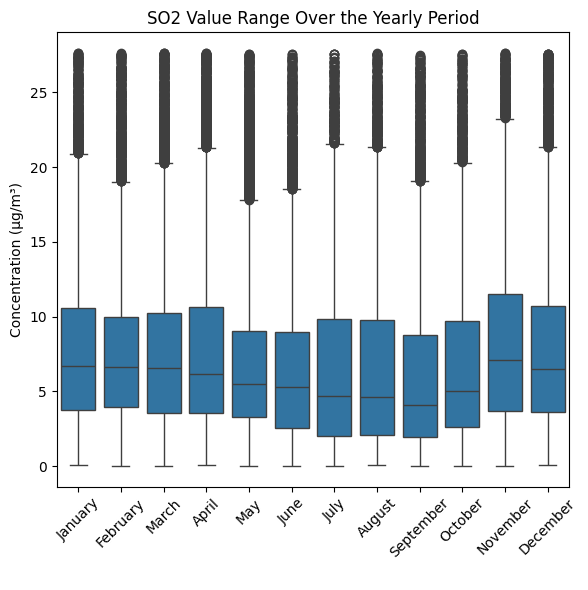

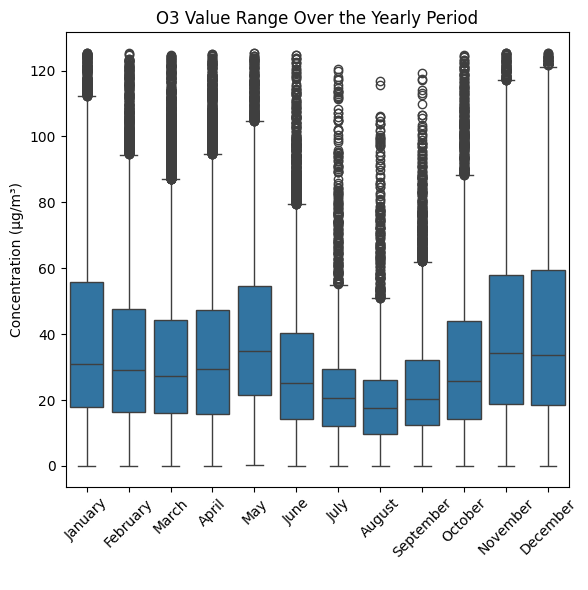

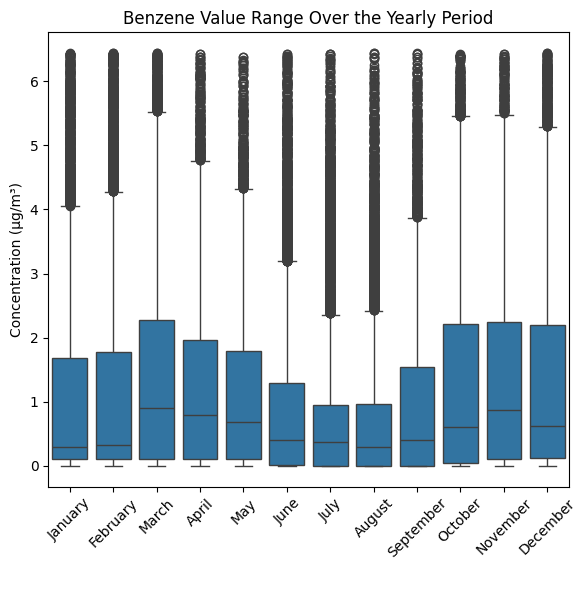

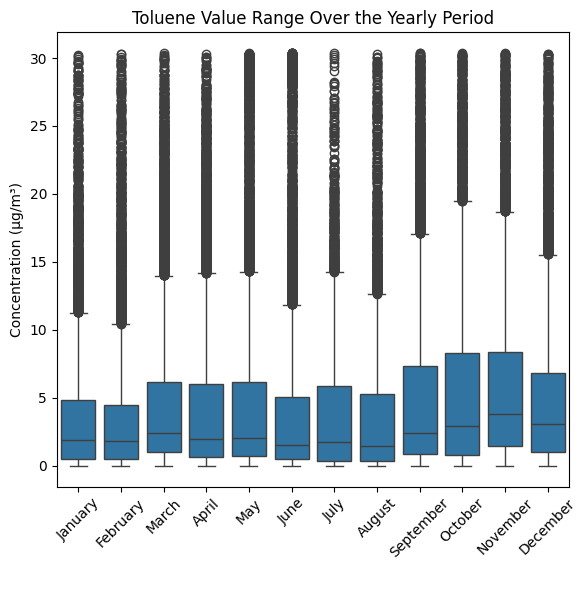

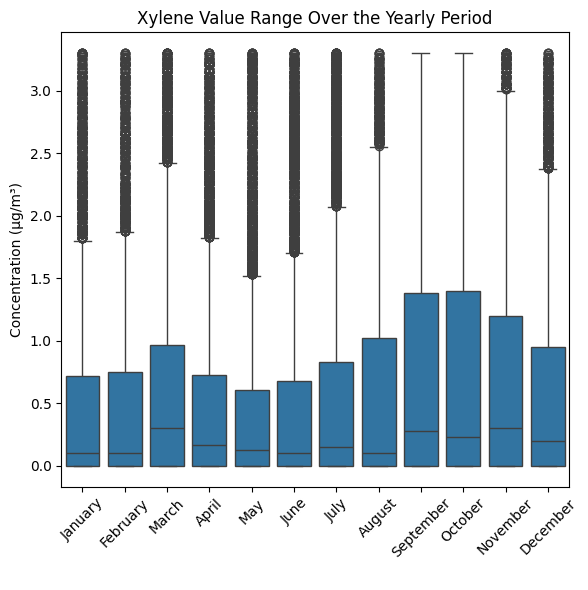

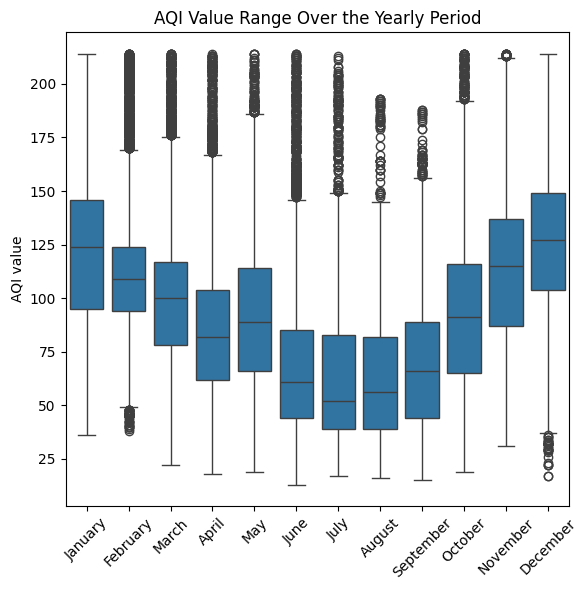

In [16]:
#Looped version of Yearly Contaminant Box Plot Distribution

values = df_city.loc[0:0, 'PM2.5':'AQI'].columns.to_list()

for value in values:
    fig, ax = plt.subplots(1, figsize=(6,6))
    sns.boxplot(data=df_city, x='Month', y = value, ax= ax)
    ax.set_title(f'{value} Value Range Over the Yearly Period')
    if value == 'PM2.5' or value == 'PM10':
        ax.set_ylabel('Concentration (μm in μg/m³)')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
    elif value == 'AQI':
        ax.set_ylabel('AQI value')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.set_ylabel('Concentration (μg/m³)')
        ax.set_xlabel(' ')
        ax.tick_params(axis='x', rotation=45)


    plt.tight_layout()                    
    plt.show()